In [154]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [155]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [156]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [157]:
# database_path = "Resources/hawaii.sqlite"

# # create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [158]:
# reflect an existing database into a new model      Activity 2-06
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect =True)

In [159]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [160]:
# Save references to each table    2-06

Station = Base.classes.station
Measurement = Base.classes.measurement



In [161]:
# Create our session (link) from Python to the DB   2-06
session = Session(engine)


# Close Session                  <<<<<<<<<<<<<<<<<<<<<<       temporary session close.... 
#session.close()            

# Exploratory Precipitation Analysis

In [162]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [163]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [164]:
# columns = inspector.get_columns('station')
# for c in columns:
#     print(c['name'],c['type'])

In [165]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

In [166]:
# import datetime as dt
# print(dt.date.today())
# help(dt.timedelta)

In [167]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.


# Starting from the most recent data point in the database.
# session.query(Measurement.date).filter(Measurement.date >= order_by(Measurement.date.desc()).first()

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

last_date

('2017-08-23')

In [168]:
# Calculate the date one year from the last date in data set.

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

year_ago

datetime.date(2016, 8, 23)

In [169]:
# Perform a query to retrieve the data and precipitation scores

# results = session.query(Measurement.date, Measurement.prcp).all()
# results

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).\
         order_by(Measurement.date).all()

results

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

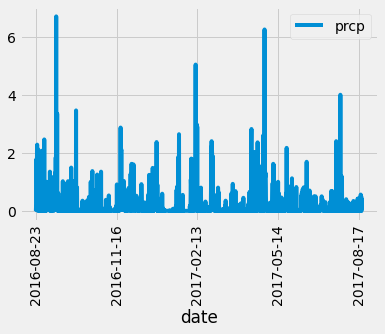

In [170]:


# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results, columns=['date', 'prcp'])

df_clean = df.dropna()
df_clean
df_clean.set_index('date', inplace=True)




# Sort the dataframe by date

df_clean.sort_values('date')
df_clean.count()


# df.sort_index(ascending=False)
# df

# Use Pandas Plotting with Matplotlib to plot the data

# df_clean.plot()
# # plt.tight_layout()
# plt.show()

df_clean.plot()
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

# df_clean.count()


In [171]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_clean.describe().round(3)



,prcp
count,2021.000
mean,0.177
std,0.461
min,0.000
25%,0.000
50%,0.020
75%,0.130
max,6.700


# Exploratory Station Analysis

In [172]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9)]

In [173]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# session.query(Station)
# active_stations = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016, 8, 23').\
#         order_by(Measurement.date).all()
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [174]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)).\
       filter(Measurement.station == "USC00519281").all()
    
#act 3-3

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

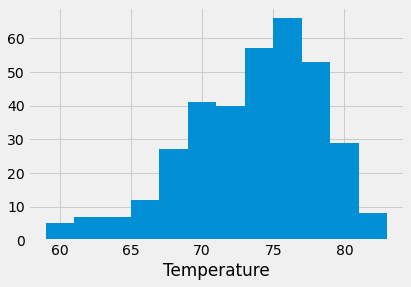

In [175]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


last_twelve = session.query(Measurement.tobs).\
        filter(Measurement.date >= year_ago).\
        filter(Measurement.station == "USC00519281").all()


last_twelve_df = pd.DataFrame(last_twelve)

# last_twelve_df.head(5)




plt.hist(last_twelve_df['tobs'], bins = 12)
plt.xlabel("Temperature")           

                            


# hist = df.hist(bins=12)
# plt.hist(last_twelve)
# last_twelve_df.plot.hist(bins=12)
# # plt.xlabel(Temperature)
# # plt.ylabel(Frequency)
# plt.show
# print(sts.normaltest(last_twelve.sample(12)))


# Close session

In [176]:
# Close Session
session.close()